# Homework 3

### Due: April 29 @ 11:59pm

In this homework we will be performing 

- feature cleaning and engineering

- dimensionality reduction and clustering


## Instructions

Follow the comments below and fill in the blanks (\_\_\_\_) to complete.

Please 'Restart and Run All' prior to submission.

Out of 67 points total.

## Part 0: Environment Setup

In [1]:
# 0. (1pt) Set up our environment with comman libraries and plotting.
#    Note: generally we would do all of our imports here but some imports
#    have been left till later where they are used.

# Import numpy, pandas, matplotlib.pyplot and seaborn
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# Execute the matplotlib magic function to display plots inline
%matplotlib inline

## Part 1: Data Cleaning and Regression

In this section we will be loading, cleaning and transforming a small set of data related to loan applications.

There are two files, one containing loan application information and the other containing borrower information.

You will need to load both files, join them and then create a new dataframe with transformations of the data which could then be used for modelling.

Each step is followed by a print or plot of some kind to help us catch errors as they happen instead of later in the pipeline.

### Data Preparation and Exploration

In [2]:
# 1. (2pts) Load Loan Application Data

# Read in the first dataframe containing loan application information.
# The path to the datafile is '../data/hw3_loan.csv'.
# Use the appropriate pandas command to read a csv file.
# 'CustomerID' is a unique id that should be set as the index using the index_col argument.
# Store this dataframe as df_loan.
df_loan = pd.read_csv('../data/hw3_loan.csv').set_index('CustomerID')

# Print the shape of df_loan (should be 633 rows, 4 columns)
df_loan.shape

(663, 4)

In [3]:
# 2. (2pts) Load Borrower Data

# Read in the first dataframe containing borrower information.
# The path to the datafile is '../data/hw3_borrower.csv'.
# Use the appropriate pandas command to read a csv file.
# 'CustomerID' is a unique id that should be set as the index using the index_col argument.
# Store this dataframe as df_borrower.
df_borrower = pd.read_csv('../data/hw3_borrower.csv').set_index('CustomerID')

# Print the shape of df_borrower (should be 633 rows, 2 columns)
df_borrower.shape

(663, 2)

In [4]:
# 3. (2pts) Join Datasets

# Join the datasets and store as df.
# Perform an inner join.
# Note that since both dataframes share an index, it is easier to use the 'join' command.
df=pd.merge(df_loan,df_borrower,on='CustomerID',how='inner')
# Print df information summary using 'info'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 2 to 750
Data columns (total 6 columns):
WasTheLoanApproved          663 non-null object
LoanReason                  663 non-null object
LoanPayoffPeriodInMonths    663 non-null int64
RequestedAmount             663 non-null int64
Age                         585 non-null float64
YearsAtCurrentEmployer      542 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 36.3+ KB


In [5]:
# 4. (1pt) LoanReason

# Loan reason is a categorical variable.
# Print the counts of each category using 'value_counts'
df.LoanReason.value_counts()

goods     312
auto      217
other      90
school     44
Name: LoanReason, dtype: int64

In [6]:
# 5. (2pts) Transform LoanReason Using One-Hot Encoding

# Transform LoanReason into one-hot encoding using 'get_dummies'.
# Use the columnname prefix 'LoanReason'.
# Leave all other arguments at defaults.
# Store resulting dataframe as df_loanreason
df_loanreason=pd.get_dummies(df['LoanReason'], prefix='LoanReason')
# Print the 'head' of df_loanreason to confirm the transformation.
df_loanreason.head()

,LoanReason_auto,LoanReason_goods,LoanReason_other,LoanReason_school
CustomerID,,,,
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0


In [7]:
# 6. (2pts) Create Transformed Feature Dataframe

# We are performing these transformations in order to use this data for modelling.
#
# Instead of adding transformed features into our original dataframe
#   it is useful to create a new dataframe containing only features used for modelling.

# Create this new dataframe by copying df_loanreason into df_features using 'copy'.
df_features=df_loanreason.copy()

# Print df_features information summary using 'info'
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 2 to 750
Data columns (total 4 columns):
LoanReason_auto      663 non-null uint8
LoanReason_goods     663 non-null uint8
LoanReason_other     663 non-null uint8
LoanReason_school    663 non-null uint8
dtypes: uint8(4)
memory usage: 7.8 KB


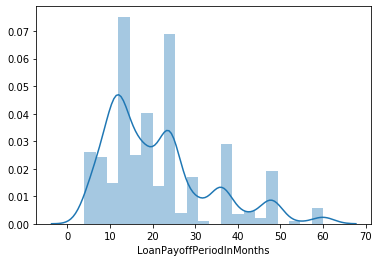

In [8]:
# 7. (1pt) LoanPayoffPeriodInMonths

# Use seaborn distplot to plot LoanPayoffPeriodInMonths using default settings.
# Note that there appear to be several modes in the data corresponding to years.
sns.distplot(df.LoanPayoffPeriodInMonths)

In [9]:
# 8. (2pts) Create Period Bins

# We'll bin LoanPayoffPeriodInMonths into [less than 1 year, 1 to 2 years, more than 2 years]
# Create a list with four values
#   minimum value in LoanPayoffPeriodInMonths
#   12
#   24
#   maximum value of LoanPayoffPeriodInMonths
# Store this list as 'period_bins'
period_bins=[min(df.LoanPayoffPeriodInMonths),12,24,max(df.LoanPayoffPeriodInMonths)]

# Print period_bins.
period_bins

[4, 12, 24, 60]

In [10]:
# 9. (3pts) Bin LoanPayoffPeriodInMonths

# Use 'pd.cut' to bin LoanPayoffPeriodInMonths.
# Use the period_bins list we created above for the bin edges.
# Set the bin labels as ['0','1','2+'].
# Store as loanperiod_years
loanperiod_years=pd.cut(df.LoanPayoffPeriodInMonths,period_bins,labels=['0','1','2+'])

# loanperiod_years is a Series.
# Print the number of items in each bin of loanperiod_years using 'value_counts'.
loanperiod_years.value_counts()

1     268
0     239
2+    154
Name: LoanPayoffPeriodInMonths, dtype: int64

In [11]:
# 10. (2pts) Transform Period Year Bins as One-Hot Encoding

# Use 'pd.get_dummies' to encode loanperiod_years.
# Use prefix 'LoanPeriodYears'.
# Store as df_loanperiod.
df_loanperiod=pd.get_dummies(loanperiod_years, prefix='LoanPeriodYears')

# Print 'head' of df_loanperiod confirm the transformation.
df_loanperiod.head()

,LoanPeriodYears_0,LoanPeriodYears_1,LoanPeriodYears_2+
CustomerID,,,
2,1,0,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0


In [12]:
# 11. (2pts) Extend Transformed Features

# Join the existing df_features dataframe with df_loanperiod.
# Note that they share an index, so join is easy to use here.
# Store the result back into df_features.
df_features=pd.merge(df_features,df_loanperiod,on='CustomerID',how='inner')
# Print df_features information summary using 'info'.
# Note that the new columns have been joined.
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 2 to 750
Data columns (total 7 columns):
LoanReason_auto       663 non-null uint8
LoanReason_goods      663 non-null uint8
LoanReason_other      663 non-null uint8
LoanReason_school     663 non-null uint8
LoanPeriodYears_0     663 non-null uint8
LoanPeriodYears_1     663 non-null uint8
LoanPeriodYears_2+    663 non-null uint8
dtypes: uint8(7)
memory usage: 9.7 KB


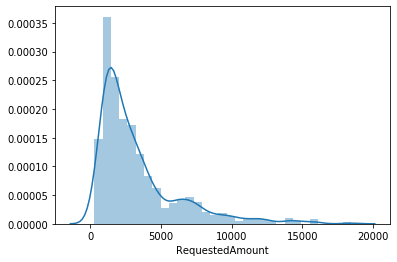

In [13]:
# 12. (1pt) RequestedAmount

# Use seaborn distplot to plot RequestedAmount using default settings.
# Note that this features is very skewed and has a very wide range.
sns.distplot(df.RequestedAmount)

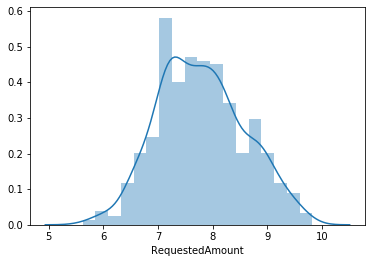

In [14]:
# 12. (2pts) Log Transform RequestedAmount

# Using the 'apply' function, apply np.log to the RequestedAmount column.
# Store the result as requestedamount_log
requestedamount_log=df.RequestedAmount.apply(np.log)

# Use seaborn distplot to plot the transformed variable using default settings.
# Note that the shape is much more 'normal'.
sns.distplot(requestedamount_log)

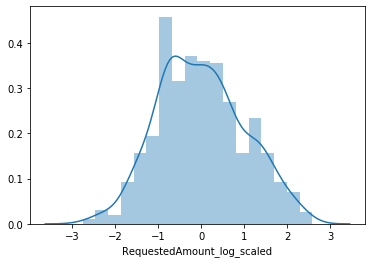

In [15]:
# 13. (3pts) Center and Scale log(RequestedAmount) Manually

# Standardize requestedamount_log by subtracting the mean and dividing by the standard deviation.
# Store the result into df_features as RequestedAmount_log_scaled
df_features['RequestedAmount_log_scaled']=(requestedamount_log-np.mean(requestedamount_log))/np.std(requestedamount_log)

# Use seaborn distplot to plot RequestedAmount_log_scaled.
# Note that data has been centered and scaled.
sns.distplot(df_features.RequestedAmount_log_scaled)

In [16]:
# 14. (2pts) Age

# The Age variable has missing values.
# Before we fill the missing values, create a dummy column noting where data is missing.
# We want to store this as an int instead of a boolean.
# Use 'isnull().astype(int)' on the Age column to both find nulls and convert boolean to int.
# Store in df_features as 'Age_missing'.
df_features['Age_missing']=df.Age.isnull().astype(int)

# Print the number of 0s and 1s in Age_missing using 'value_counts'.
df_features.Age_missing.value_counts()

0    585
1     78
Name: Age_missing, dtype: int64

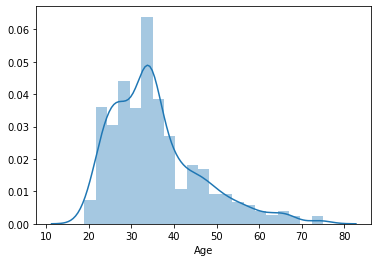

In [17]:
# 15. (2pts) Fill Age with Median

# Age may be skewed so fill missing values using median instead of mean.
# Use 'fillna' and 'median' to fill the missing values in Age with the median of Age.
# Store back into df['Age']
df['Age']=df.Age.fillna(df.Age.median())

# Use seaborn distplot to plot Age.
# Note that we might want to transform this variable using log to remove skew 
#    but will not do so in this homework.
sns.distplot(df.Age)

In [18]:
# 16. (3pts) Center and Scale Age Using StandardScaler

# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Using StandardScaler and fit_transform, standardize the Age columns.
# Note that fit_transform expects a DataFrame not a Series.
# Use df[['Age']] to return a DataFrame.
# Store the result in df_features as 'Age_scaled'
df_features['Age_scaled']=StandardScaler().fit_transform(df[['Age']])

# Print out the mean and standard deviation of Age_scaled.
print(f'Mean:{df_features.Age_scaled.mean():0.3f}')
print(f'Standard deviation:{df_features.Age_scaled.std():0.3f}')

Mean:0.000
Standard deviation:1.001


In [19]:
# 17. (1pt) YearsAtCurrentEmployer

# There are missing values in YearsAtCurrentEmployer as well.
# Since this is a categorical feature, we'll fill with the most common value (mode).
# First, print the number of items in each category, including nan's
#   using value_counts with dropna=False
df.YearsAtCurrentEmployer.value_counts(dropna=False)

4      183
10+    135
NaN    121
7       98
1       97
0       29
Name: YearsAtCurrentEmployer, dtype: int64

In [20]:
# 18. (2pts) Get Mode of YearsAtCurrentEmployer

# Pandas Series has a 'mode' function that returns another series containing the modes of the original series.
# We just want the first value in that series.
# Use '.mode().values[0]' to get the first value in the series returned by mode.
# Store in years_mode
years_mode=df.YearsAtCurrentEmployer.mode().values[0]

# Print the value found.
years_mode

'4'

In [21]:
# 19. (2pts) Fill Missing in YearsAtCurrentEmployer With Mode

# Use fillna and years_mode to fill the missing values in the YearsAtCurrentEmployer column.
# Store back into df.YearsAtCurrentEmployer
df.YearsAtCurrentEmployer=df.YearsAtCurrentEmployer.fillna(years_mode)

# Print the value_counts of YearsAtCurrentEmployer, again with dropna=False.
# Note that there are no longer nan's.
df.YearsAtCurrentEmployer.value_counts(dropna=False)

4      304
10+    135
7       98
1       97
0       29
Name: YearsAtCurrentEmployer, dtype: int64

In [22]:
# 20. (2pts) One-Hot Encode YearsAtCurrentEmployer

# Use 'pd.get_dummies' to encode YearsAtCurrentEmployer.
# Use prefix 'YearsAtCurrentEmployer'.
# Store as df_employed.
df_employed=pd.get_dummies(df.YearsAtCurrentEmployer, prefix='YearsAtCurrentEmployer')

# Print 'head' of df_employed to confirm the transformation.
df_employed.head()

,YearsAtCurrentEmployer_0,YearsAtCurrentEmployer_1,YearsAtCurrentEmployer_10+,YearsAtCurrentEmployer_4,YearsAtCurrentEmployer_7
CustomerID,,,,,
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,1,0,0
5,0,0,0,1,0
6,0,0,1,0,0


In [23]:
# 21. (2pts) Extend Transformed Features with YearsAtCurrentEmployer

# Join the existing df_features dataframe with df_employed.
# Note that they share an index, so join is easy to use here.
# Store the result back into df_features.
df_features=pd.merge(df_features,df_employed,on='CustomerID',how='inner')

# Print df_features information summary using 'info'.
# Note that the new columns have been joined, all datatypes are numeric and there are no missing values.
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 2 to 750
Data columns (total 15 columns):
LoanReason_auto               663 non-null uint8
LoanReason_goods              663 non-null uint8
LoanReason_other              663 non-null uint8
LoanReason_school             663 non-null uint8
LoanPeriodYears_0             663 non-null uint8
LoanPeriodYears_1             663 non-null uint8
LoanPeriodYears_2+            663 non-null uint8
RequestedAmount_log_scaled    663 non-null float64
Age_missing                   663 non-null int32
Age_scaled                    663 non-null float64
YearsAtCurrentEmployer_0      663 non-null uint8
YearsAtCurrentEmployer_1      663 non-null uint8
YearsAtCurrentEmployer_10+    663 non-null uint8
YearsAtCurrentEmployer_4      663 non-null uint8
YearsAtCurrentEmployer_7      663 non-null uint8
dtypes: float64(2), int32(1), uint8(12)
memory usage: 25.9 KB


# Part 2 : PCA and K-Means

The MNIST digits dataset is composed of a set of images of handwritten digits from 0 to 9.
There are 1797 images, each 8x8 pixels.
If we flatten out each image we get a dataset of 1797 observations, each with 64 features, each belonging to one of 10 classes.
Here we'll reduce dimensionality to 2-D to see if the data clusters by class.

In [24]:
# 22. (4pts) Load the Digits Dataset

# This dataset loads as a dictionary.
# For our purposes we need access to 3 things by key name:
#   'images': a list of lists with images stored in their 8x8 form
#   'data': a list of lists with images flattened in their 1x64 form
#   'target': a list of category labels

# From sklearn datasets import load_digits.
from sklearn.datasets import load_digits

# Load the dataset into 'digits' using load_digits
digits=load_digits()

# Extract digits['data'] to X_digits. No need to reshape.
X_digits=digits['data']

# Extract the labels in digits['target'] to y_digits
y_digits=digits['target']

# Print the shape of X_digits (should be 1797 rows, 64 columns).
X_digits.shape

(1797, 64)

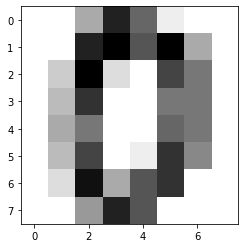

In [25]:
# 23. (2pts) Plot the first image in digits['images'].

# 'digits['images']' is a list of images of size 8x8 pixels.
# Plot the first image using plt.imshow with cmap=plt.cm.gray_r, all other arguments as their default.
# You should see a black '0' on a white background.
plt.imshow(digits['images'][0],cmap=plt.cm.gray_r)

In [26]:
# 24. (2pts) Import and Instantiate PCA

# Import PCA from sklearn
from sklearn.decomposition import PCA

# Instantiate a pca object that will result in 2 components being returned.
# Use random_state=123, all other arguments as their default.
# Store as 'pca'.
pca=PCA(n_components=2,random_state=123)

In [27]:
# 25. (2pts) Transform X_digits Using PCA

# Using pca created above, call fit_transform on X_digits to transform into 2-D.
# Store as X_2D.
X_2D=pca.fit_transform(X_digits)

# Print the  shape of X_2D. Should be (1797,2)
X_2D.shape

(1797, 2)

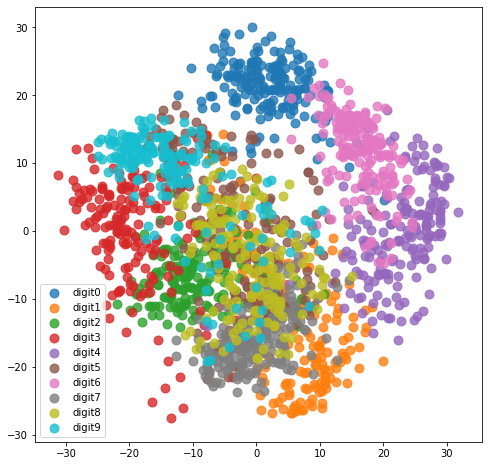

In [28]:
# 26. (4pts) Plot PCA Representation Colored by Labels

# In this example, we have labels for our dataset.
# Create a plot visualizing X_2D as a scatterplot, colored by label.
# We should see that classes are somewhat seperable, with some overlap.

# Create a single figure and axis of size 8,8 using plt.subplots.
fig,ax=plt.subplots(1,1,figsize=(8,8))

# For each category (0 to 9):
for category in range(10):
    # Select the rows from X_2D with that label using y_digit.
    # Store as X_subset
    X_subset=X_2D[y_digits == category]
    # Add a scatter plot of X_subset to the axis using ax.scatter()
    #    with s=80 (size), alpha=0.8 (to make markers transparent) and label='digit' + str(category)
    ax.scatter(X_subset[:,0],X_subset[:,1],s=80 , alpha=0.8,label='digit' + str(category))

# Add a legend to the plot.
ax.legend()


## K-Means Clustering

How clustered are our classes? Can k-Means find clusters in the 2D PCA transformed data that at all correspond to the plot seen above?

In [29]:
# 27. (2pts) Import and Instantiate KMeans

# Import KMeans from sklearn
from sklearn.cluster import KMeans

# Intantiate a KMeans object which will generate 10 clusters.
# Use random_state=123, all other arguments as their default.
# Store as 'km'.
km = KMeans(n_clusters=10,random_state=123) 

In [30]:
# 28. (2pts) Generate Cluster Assignments

# Use 'fit_predict' on X_2D to both fit our k-means model and generate cluster assignments.
# Store the result as 'cluster_assignments'.
cluster_assignments=km.fit_predict(X_2D)

# Print the first 10 cluster assignments
# Note: cluster assignment values will be from 0 to 9
cluster_assignments[:10]

array([5, 0, 9, 4, 7, 8, 7, 3, 1, 1])

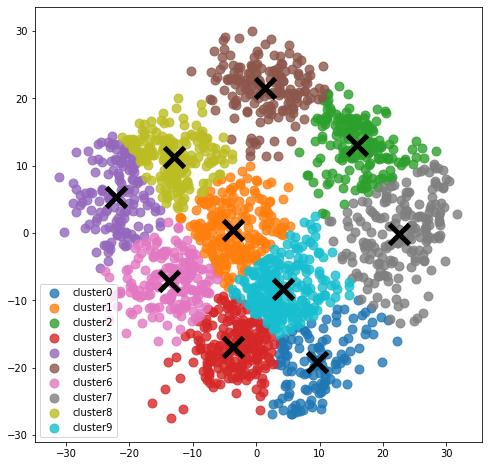

In [31]:
# 29. (5pts) Plot PCA Representation Colored by Cluster Assignment

# Create the same plot as we did above, again using the X_2D data,
#   this time color the data by cluster instead of class label.
# Use s=80 (size), alpha=0.8, label='cluster '+str(i)

# Note that the cluster assignments should look very similar to the class assignments in the plot above, 
#   meaning that the data is highly clustered even in this 2D space.
# Also note that the colors may be different from the plot above, since there is no ordering to the clusters.

# Create a single figure and axis of size8,8 using plt.subplots.
fig,ax=plt.subplots(1,1,figsize=(8,8))

# For each cluster (0 to 9):
for cluster in range(10):
    # Select the rows from X_2D in that cluster using cluster_assignment.
    # Store as X_subset.
    X_subset=X_2D[cluster_assignments == cluster]
    
    # Add a scatter plot of X_subset to the figure using ax.scatter()
    #     with s=80, alpha=0.8 and label='cluster' + str(cluster)
    ax.scatter(X_subset[:,0],X_subset[:,1],s=80 , alpha=0.8,label='cluster' + str(cluster))
    
    # Also plot each the cluster centers as x's using ax.plot()
    #    with marker='x', c='k', ms=20, label=None
    #    Cluster centers are stored as a list of tuples in km.cluster_centers_.
    ax.plot(km.cluster_centers_[cluster,0],km.cluster_centers_[cluster,1], marker='x',c='k', ms=20, mew=5)
        
# Add a legend to the plot.
ax.legend()